<a href="https://colab.research.google.com/github/ianmcloughlin/2223-S1-emerging-technologies/blob/main/notebooks/03-computation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color: rgb(0, 91, 94);">Computation</h1>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

This notebook a quick overview of some computational problems, setting the stage for Quantum Computation later.


<h2 style="color: rgb(0, 91, 94);">Papers and Articles</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Many computational problems that we often take for granted are not fully resolved.

For instance, we are not sure if our matrix multiplication algorithms are as fast as is possible.

See the following articles and papers for some insight.

<a href="https://www.quantamagazine.org/mathematicians-inch-closer-to-matrix-multiplication-goal-20210323/" style="color: #ff791e">Matrix Multiplication Inches Closer to Mythic Goal; </a> *Kevin Hartnett;* Quanta magazine


<a href="https://www.nature.com/articles/s41586-022-05172-4" style="color: #ff791e">Discovering faster matrix multiplication algorithms with reinforcement learning;</a> *Alhussein Fawzi, Matej Balog, Aja Huang, Thomas Hubert, Bernardino Romera-Paredes, Mohammadamin Barekatain, Alexander Novikov, Francisco J. R. Ruiz, Julian Schrittwieser, Grzegorz Swirszcz, David Silver, Demis Hassabis & Pushmeet Kohli;* Nature

<a href="https://arxiv.org/abs/2210.04045" style="color: #ff791e">The FBHHRBNRSSSHK-Algorithm for Multiplication in $\mathbb{Z}_2^{5 \times 5}$ is still not the end of the story;</a> *Manuel Kauers, Jakob Moosbauer;* arXiv 


<a href="https://arxiv.org/abs/2010.05846" style="color: #ff791e">A Refined Laser Method and Faster Matrix Multiplication;</a> *Josh Alman, Virginia Vassilevska Williams;* arXiv



<h2 style="color: rgb(0, 91, 94);">Growth Rates</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

In discussing computation, we must have a clear picture of what we mean by complexity.

One of the most important distinctions is between polynomial growth and exponential growth.

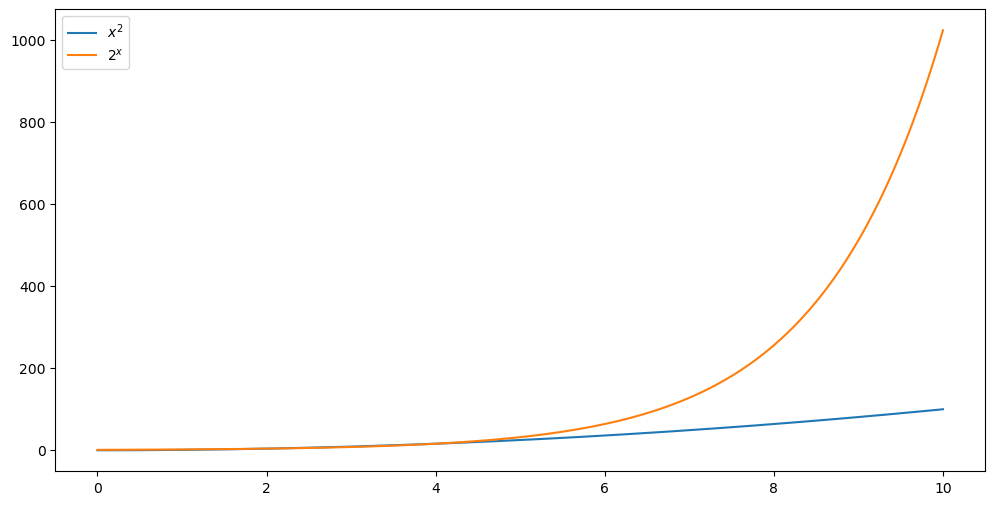

In [ ]:
# Numbers.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Create a figure.
fig, ax = plt.subplots(figsize=(12, 6))

# x values.
x = np.linspace(0.0, 10.0, 1000)

# Plot polynomial.
ax.plot(x, x**2, label="$x^2$")

# Plot exponential.
ax.plot(x, 2**x, label="$2^x$")

# Legend.
ax.legend()

# Show.
plt.show();

<h2 style="color: rgb(0, 91, 94);">Big O Notation</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Let $f$ and $g$ be functions. Then $f$ is $O(g)$ if there are positive integers $c$ and $n_0$ such that for every $n \geq n_0$: $f(n) \leq c g(n)$

<h3 style="color: #001a79;">Exercise 1</h3>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

Describe and plot five examples of pairs of functions $f$ and $g$ such that $f$ is $O(g)$.

<hr style="border-top: 1px solid #001a79;" />

<h2 style="color: rgb(0, 91, 94);">Turing Machine</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

Classical computers are built on the foundations of Turing's seminal work:

<a href="https://www.cs.virginia.edu/~robins/Turing_Paper_1936.pdf" style="color: #ff791e">On Computable Numbers, with an Application to the Entscheidungsproblem;</a> *A. M. Turing;* Nov 1937; Proceedings of the London Mathematical Society. 

Below we simulate a Turing machine using Python.

In [ ]:
# State table.
table = {
    ('X', '_'): ['_', 'R', 'T'],
    ('X', '0'): ['0', 'R', 'X'],
    ('X', '1'): ['1', 'R', 'Y'],
    ('Y', '_'): ['_', 'R', 'F'],
    ('Y', '0'): ['0', 'R', 'Y'],
    ('Y', '1'): ['1', 'R', 'X'],
}

# Tape input.
tape = list('0101111')
# Position on tape.
pos = 0
# Initial state is first in table.
state = 'X'

# Keep going while we are not in a halting state.
while state not in ['T', 'F']:
    # Print the current status.
    print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))
    # Get the row of the table.
    row = table[(state, tape[pos])]
    # Overwrite the symbol.
    tape[pos] = row[0]
    # Move left or right.
    if row[1] == 'R':
        # Put blanks on tape as necessary.
        if pos == len(tape) - 1:
            tape = tape + ['_']
        # Increase position.
        pos = pos + 1
    else:
        # Put blanks on tape as necessary.
        if pos == 0:
            tape = ['_'] + tape
            # The position on the tape has to move with it.
            pos = pos + 1
        # Decrease position.
        pos = pos - 1
    # Update the state.
    state = row[2]

# Print the current status.
print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))

X0101111
0X101111
01Y01111
010Y1111
0101X111
01011Y11
010111X1
0101111Y_
0101111_F_


<h3 style="color: #001a79;">Exercise 2</h3>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

Change the above code to only accept inputs that do not contain any 1's.

<hr style="border-top: 1px solid #001a79;" />

<h2 style="color: rgb(0, 91, 94);">Experiments Challenging Turing's Thesis</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<h3><a style="color: #ff791e" href="https://en.wikipedia.org/wiki/Double-slit_experiment">Double Slit Experiment</a></h3>

<img style="border: 1px solid #ff791e" width="90%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Double-slit.svg/1024px-Double-slit.svg.png">


<h3><a style="color: #ff791e" href="https://en.wikipedia.org/wiki/Stern%E2%80%93Gerlach_experiment">Stern Gerlach</a></h3>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/Stern-Gerlach_experiment_svg.svg/1024px-Stern-Gerlach_experiment_svg.svg.png" style="border: 1px solid #ff791e" width="90%">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Stern-Gerlach_Analyzer_Sequential_Series_E3.png/1024px-Stern-Gerlach_Analyzer_Sequential_Series_E3.png" style="border: 1px solid #ff791e" width="90%">


<h2 style="color: rgb(0, 91, 94);">Classical Circuits</h2>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<a style="color: #ff791e" href="https://mybinder.org/v2/gh/atumath/schemdraw-binder/main?urlpath=git-pull%3Frepo%3Dhttps%253A%252F%252Fgithub.com%252Fianmcloughlin%252Fcircuits-notebooks%26urlpath%3Dtree%252Fcircuits-notebooks%252F%26branch%3Dmain">A Binder Repository on Classical Circuits</a>

<a style="color: #ff791e" href="https://github.com/ianmcloughlin/circuits-notebooks">The GitHub Repository for the above notebooks</a>

<a style="color: #ff791e" href="https://github.com/atumath/schemdraw-binder">The GitHub Repository for the above binder instance</a>

<a style="color: #ff791e" href="https://nandgame.com/">A Game Using Nand Gates</a>

<hr style="border-top: 1px solid rgb(0, 91, 94);" />

<h2 style="color: rgb(0, 91, 94);">End</h2>